In [224]:
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt

In [225]:
progressPath = "./progression/"
statsPath = "./stats/"

In [226]:
# I WANT: (NK, ZKC, ZKW) -> NK = ([confs], [times], [results], [deviations]) -> times = [instanceSizes] -> instanceSize = [int]


def dataOfAlgo(algoName):
  algoNK = dataOfFile(path + algoName)
  return (algoNK, )

def dataOfFile(filename):
  lines = ''.join(readFile(filename))
  segments = lines.split("=")
  confs = segmentToValues(segments[0])
  times = segmentToValues(segments[1])
  results = segmentToValues(segments[2])
  return (confs, times, results)

def segmentToValues(segment):
  instanceSizes = segment.split("\n")
  result = []
  for i in instanceSizes:
    if(len(i) > 1):
      values = list(map(int, i.split(" ")))
      result.append(values)
  return result

def segmentToStates(line):
  return list(map(float, line.split(" ")))

def readFile(filename):
  with open(filename) as f:
    lines = f.readlines()
    return lines
    

In [227]:
test1 = segmentToStates(readFile(progressPath + "TEST")[0])
test1best = segmentToStates(readFile(progressPath + "TEST")[2])
test2 = segmentToStates(readFile(progressPath + "TEST2")[0])
test2best = segmentToStates(readFile(progressPath + "TEST2")[2])
print(test2[len(test2) - 10:])

[3345.0, 3683.0, 3684.0, 4086.0, 3927.0, 3413.0, 3524.0, 3523.0, 3412.0, 3364.0]


In [228]:
def deviation(value1, value2):
  return abs(value1 - value2) / max(value1, value2, 1)

def avg(data):
  return sum(data) / len(data)

def getDeviationsPSet(data, optData):
  resultsData = data[2]
  resultsOData = optData[2]

  deviations = []
  for i,f in enumerate(resultsData):
    fDeviations = []
    for j,r in enumerate(f):
      devi = deviation(resultsData[i][j], resultsOData[i][j])
      fDeviations.append(devi)
    deviations.append(fDeviations)
  return deviations

def getDevs(data, optData):
  dnk = getDeviationsPSet(data[0], optData[0])
  return (dnk, )

def getMaxsPSet(data):
  maxs = []
  for f in data:
    maxs.append(max(f))
  return maxs

def getAvgsPSet(data):
  maxs = []
  for f in data:
    maxs.append(avg(f))
  return maxs

def getMaxs(data):
  mnk = getMaxsPSet(data[0][1])
  return (mnk, )

def getAvgs(data):
  mnk = getAvgsPSet(data[0][1])
  return (mnk, )


In [229]:
# DATA IP

ip = [0.1, 0.25, 0.5, 0.6, 0.8, 0.9, 0.99, 0.999, 0.9999]

fastt = [5.49	,5.26,	5.3,	5.32,	5.12,	5.59,	5.85, 7.06, 8.49]
fastd = [0.115,	0.115,	0.118,	0.119,	0.119,	0.113,	0.093, 0.079, 0.069]

medt = [13.61,	13.41,	13.54,	13.05,	12.95,	13.17,	14.06, 17.62, 20.26]
medd = [0.079,	0.081,	0.079,	0.082,	0.083,	0.081,	0.072, 0.056, 0.049]

slowt = [33.41,	32.11,	33.75,	33.58,	34.39,	33.23,	36.32, 41.83, 51.76]
slowd = [0.058,	0.059,	0.057,	0.059,	0.058,	0.057,	0.049, 0.038, 0.034]

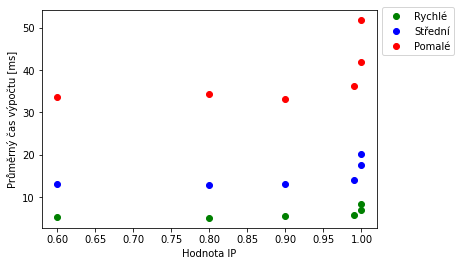

In [230]:
cut = 3
plt.plot(ip[cut:], fastt[cut:], 'o', label="Fast", color="green")
plt.plot(ip[cut:], medt[cut:], 'o', label="Medium", color="blue")
plt.plot(ip[cut:], slowt[cut:], 'o', label="Slow", color="red")
plt.xlabel("Hodnota IP")
plt.ylabel("Průměrný čas výpočtu [ms]")
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')

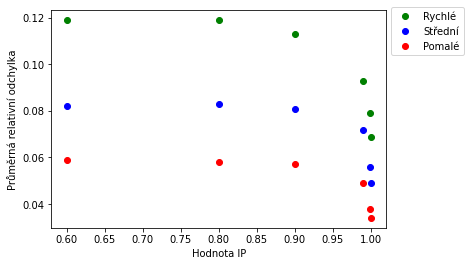

In [231]:
plt.plot(ip[cut:], fastd[cut:], 'o', label="Fast", color="green")
plt.plot(ip[cut:], medd[cut:], 'o', label="Medium", color="blue")
plt.plot(ip[cut:], slowd[cut:], 'o', label="Slow", color="red")
plt.xlabel("Hodnota IP")
plt.ylabel("Průměrná relativní odchylka")
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')

In [232]:
# DATA RC

rc = [0.01, 0.1, 1, 5, 10, 20, 50]

fastt = []
fastd = []

medt = []
medd = []

slowt = [35.74, 35.66, 34.93, 35.11, 35.61, 34.73, 35.73]
slowd = [0.048, 0.048, 0.051, 0.048, 0.050, 0.047, 0.048]

In [233]:
# DATA F

f = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2, 5]

fastt = [22.29, 18.23, 13.66, 9.59, 7.06, 5.79, 5.10, 3.91]
fastd = [0.061, 0.065, 0.068, 0.076, 0.082, 0.097, 0.115, 0.142]

medt = [59.50, 48.44, 34.90, 23.74, 16.57, 14.19, 11.85, 8.90]
medd = [0.044, 0.046, 0.047, 0.052, 0.06, 0.067, 0.084, 0.115]

slowt = [62.34, 41.14, 36.54, 29.79, 21.6]
slowd = [0.033, 0.045, 0.047, 0.056, 0.084]


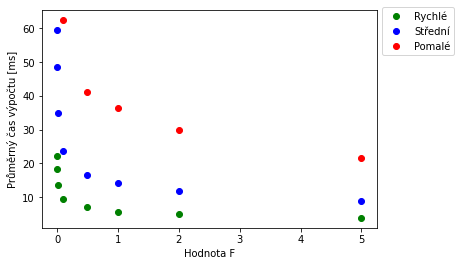

In [234]:
cut = 0
plt.plot(f[cut:], fastt[cut:], 'o', label="Fast", color="green")
plt.plot(f[cut:], medt[cut:], 'o', label="Medium", color="blue")
plt.plot(f[3:], slowt[cut:], 'o', label="Slow", color="red")
plt.xlabel("Hodnota F")
plt.ylabel("Průměrný čas výpočtu [ms]")
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')

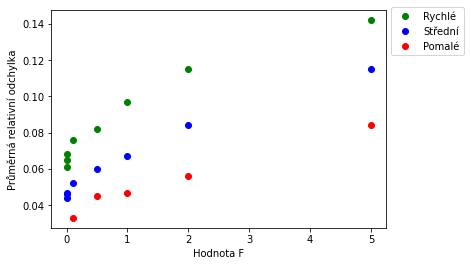

In [235]:
plt.plot(f[cut:], fastd[cut:], 'o', label="Fast", color="green")
plt.plot(f[cut:], medd[cut:], 'o', label="Medium", color="blue")
plt.plot(f[3:], slowd[cut:], 'o', label="Slow", color="red")
plt.xlabel("Hodnota F")
plt.ylabel("Průměrná relativní odchylka")
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')

In [236]:
m20f = (segmentToStates(readFile(statsPath + "M-20-78-fast")[0]), segmentToStates(readFile(statsPath + "M-20-78-fast")[1]))
m20m = (segmentToStates(readFile(statsPath + "M-20-78-medium")[0]), segmentToStates(readFile(statsPath + "M-20-78-medium")[1]))
m20s = (segmentToStates(readFile(statsPath + "M-20-78-slow")[0]), segmentToStates(readFile(statsPath + "M-20-78-slow")[1]))
m50f = (segmentToStates(readFile(statsPath + "M-50-201-fast")[0]), segmentToStates(readFile(statsPath + "M-50-201-fast")[1]))
m50m = (segmentToStates(readFile(statsPath + "M-50-201-medium")[0]), segmentToStates(readFile(statsPath + "M-50-201-medium")[1]))
m50s = (segmentToStates(readFile(statsPath + "M-50-201-slow")[0]), segmentToStates(readFile(statsPath + "M-50-201-slow")[1]))
a20f = (segmentToStates(readFile(statsPath + "A-20-88-fast")[0]), segmentToStates(readFile(statsPath + "A-20-88-fast")[1]))
a20m = (segmentToStates(readFile(statsPath + "A-20-88-medium")[0]), segmentToStates(readFile(statsPath + "A-20-88-medium")[1]))
a20s = (segmentToStates(readFile(statsPath + "A-20-88-slow")[0]), segmentToStates(readFile(statsPath + "A-20-88-slow")[1]))
a50f = (segmentToStates(readFile(statsPath + "A-50-91-fast")[0]), segmentToStates(readFile(statsPath + "A-50-91-fast")[1]))
a50m = (segmentToStates(readFile(statsPath + "A-50-91-medium")[0]), segmentToStates(readFile(statsPath + "A-50-91-medium")[1]))
a50s = (segmentToStates(readFile(statsPath + "A-50-91-slow")[0]), segmentToStates(readFile(statsPath + "A-50-91-slow")[1]))
q20f = (segmentToStates(readFile(statsPath + "Q-20-78-fast")[0]), segmentToStates(readFile(statsPath + "Q-20-78-fast")[1]))
q20m = (segmentToStates(readFile(statsPath + "Q-20-78-medium")[0]), segmentToStates(readFile(statsPath + "Q-20-78-medium")[1]))
q20s = (segmentToStates(readFile(statsPath + "Q-20-78-slow")[0]), segmentToStates(readFile(statsPath + "Q-20-78-slow")[1]))
q50f = (segmentToStates(readFile(statsPath + "Q-50-201-fast")[0]), segmentToStates(readFile(statsPath + "Q-50-201-fast")[1]))
q50m = (segmentToStates(readFile(statsPath + "Q-50-201-medium")[0]), segmentToStates(readFile(statsPath + "Q-50-201-medium")[1]))
q50s = (segmentToStates(readFile(statsPath + "Q-50-201-slow")[0]), segmentToStates(readFile(statsPath + "Q-50-201-slow")[1]))
r20f = (segmentToStates(readFile(statsPath + "R-20-78-fast")[0]), segmentToStates(readFile(statsPath + "R-20-78-fast")[1]))
r20m = (segmentToStates(readFile(statsPath + "R-20-78-medium")[0]), segmentToStates(readFile(statsPath + "R-20-78-medium")[1]))
r20s = (segmentToStates(readFile(statsPath + "R-20-78-slow")[0]), segmentToStates(readFile(statsPath + "R-20-78-slow")[1]))
r50f = (segmentToStates(readFile(statsPath + "R-50-201-fast")[0]), segmentToStates(readFile(statsPath + "R-50-201-fast")[1]))
r50m = (segmentToStates(readFile(statsPath + "R-50-201-medium")[0]), segmentToStates(readFile(statsPath + "R-50-201-medium")[1]))
r50s = (segmentToStates(readFile(statsPath + "R-50-201-slow")[0]), segmentToStates(readFile(statsPath + "R-50-201-slow")[1]))
n20f = (segmentToStates(readFile(statsPath + "N-20-78-fast")[0]), segmentToStates(readFile(statsPath + "N-20-78-fast")[1]))
n20m = (segmentToStates(readFile(statsPath + "N-20-78-medium")[0]), segmentToStates(readFile(statsPath + "N-20-78-medium")[1]))
n20s = (segmentToStates(readFile(statsPath + "N-20-78-slow")[0]), segmentToStates(readFile(statsPath + "N-20-78-slow")[1]))
n50f = (segmentToStates(readFile(statsPath + "N-50-201-fast")[0]), segmentToStates(readFile(statsPath + "N-50-201-fast")[1]))
n50m = (segmentToStates(readFile(statsPath + "N-50-201-medium")[0]), segmentToStates(readFile(statsPath + "N-50-201-medium")[1]))
n50s = (segmentToStates(readFile(statsPath + "N-50-201-slow")[0]), segmentToStates(readFile(statsPath + "N-50-201-slow")[1]))

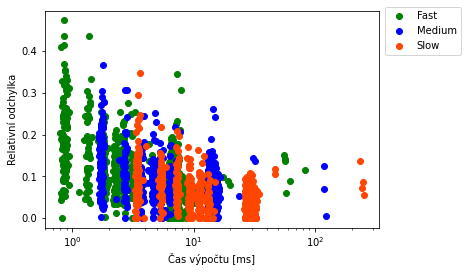

In [237]:
plt.scatter(m20f[0], m20f[1], color="green", label="Fast")
plt.scatter(m20m[0], m20m[1], color="blue", label="Medium")
plt.scatter(m20s[0], m20s[1], color="orangered", label="Slow")
plt.xlabel("Čas výpočtu [ms]")
plt.ylabel("Relativní odchylka")
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')
plt.xscale("log")
plt.show()

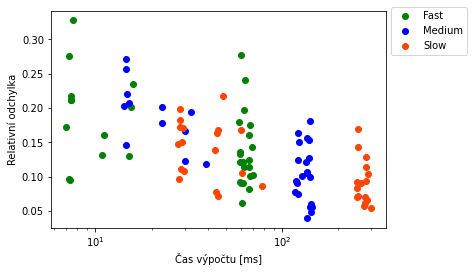

In [238]:
plt.scatter(m50f[0], m50f[1], color="green", label="Fast")
plt.scatter(m50m[0], m50m[1], color="blue", label="Medium")
plt.scatter(m50s[0], m50s[1], color="orangered", label="Slow")
plt.xlabel("Čas výpočtu [ms]")
plt.ylabel("Relativní odchylka")
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')
plt.xscale("log")
plt.show()

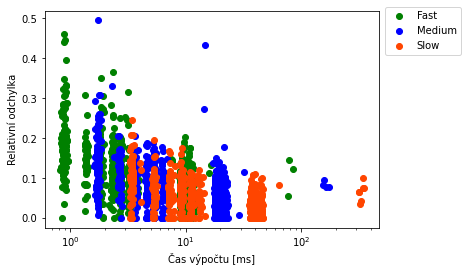

In [239]:
plt.scatter(n20f[0], n20f[1], color="green", label="Fast")
plt.scatter(n20m[0], n20m[1], color="blue", label="Medium")
plt.scatter(n20s[0], n20s[1], color="orangered", label="Slow")
plt.xlabel("Čas výpočtu [ms]")
plt.ylabel("Relativní odchylka")
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')
plt.xscale("log")
plt.show()

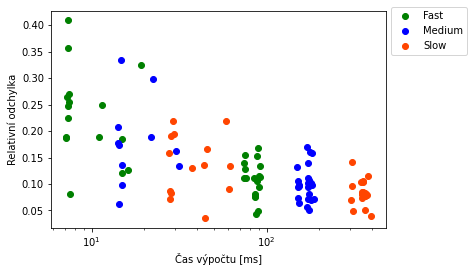

In [240]:
plt.scatter(n50f[0], n50f[1], color="green", label="Fast")
plt.scatter(n50m[0], n50m[1], color="blue", label="Medium")
plt.scatter(n50s[0], n50s[1], color="orangered", label="Slow")
plt.xlabel("Čas výpočtu [ms]")
plt.ylabel("Relativní odchylka")
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')
plt.xscale("log")
plt.show()

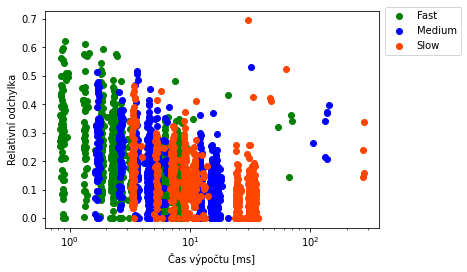

In [241]:
plt.scatter(q20f[0], q20f[1], color="green", label="Fast")
plt.scatter(q20m[0], q20m[1], color="blue", label="Medium")
plt.scatter(q20s[0], q20s[1], color="orangered", label="Slow")
plt.xlabel("Čas výpočtu [ms]")
plt.ylabel("Relativní odchylka")
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')
plt.xscale("log")
plt.show()

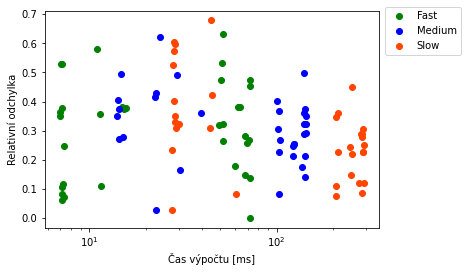

In [242]:
plt.scatter(q50f[0], q50f[1], color="green", label="Fast")
plt.scatter(q50m[0], q50m[1], color="blue", label="Medium")
plt.scatter(q50s[0], q50s[1], color="orangered", label="Slow")
plt.xlabel("Čas výpočtu [ms]")
plt.ylabel("Relativní odchylka")
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')
plt.xscale("log")
plt.show()

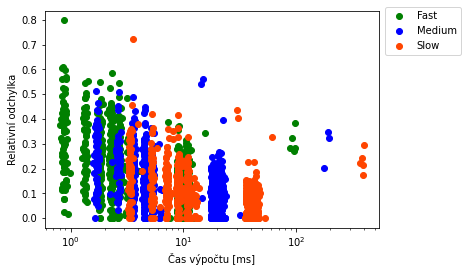

In [243]:
plt.scatter(r20f[0], r20f[1], color="green", label="Fast")
plt.scatter(r20m[0], r20m[1], color="blue", label="Medium")
plt.scatter(r20s[0], r20s[1], color="orangered", label="Slow")
plt.xlabel("Čas výpočtu [ms]")
plt.ylabel("Relativní odchylka")
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')
plt.xscale("log")
plt.show()

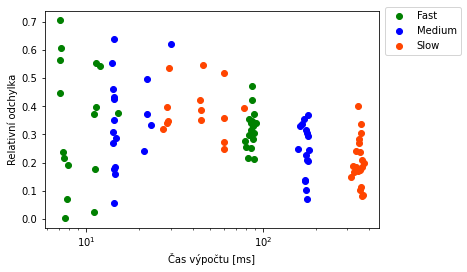

In [244]:
plt.scatter(r50f[0], r50f[1], color="green", label="Fast")
plt.scatter(r50m[0], r50m[1], color="blue", label="Medium")
plt.scatter(r50s[0], r50s[1], color="orangered", label="Slow")
plt.xlabel("Čas výpočtu [ms]")
plt.ylabel("Relativní odchylka")
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')
plt.xscale("log")
plt.show()

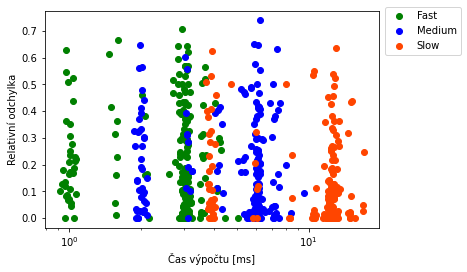

In [245]:
plt.scatter(a20f[0], a20f[1], color="green", label="Fast")
plt.scatter(a20m[0], a20m[1], color="blue", label="Medium")
plt.scatter(a20s[0], a20s[1], color="orangered", label="Slow")
plt.xlabel("Čas výpočtu [ms]")
plt.ylabel("Relativní odchylka")
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')
plt.xscale("log")
plt.show()

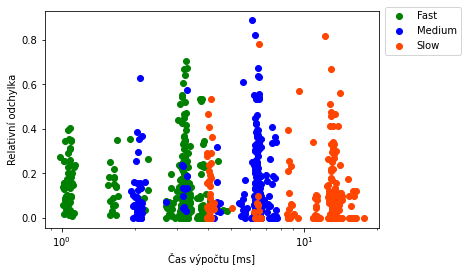

In [246]:
plt.scatter(a50f[0], a50f[1], color="green", label="Fast")
plt.scatter(a50m[0], a50m[1], color="blue", label="Medium")
plt.scatter(a50s[0], a50s[1], color="orangered", label="Slow")
plt.xlabel("Čas výpočtu [ms]")
plt.ylabel("Relativní odchylka")
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')
plt.xscale("log")
plt.show()

Text(0.5, 1.0, 'Vývoj celkové ceny věcí při ochlazování = 0.8')

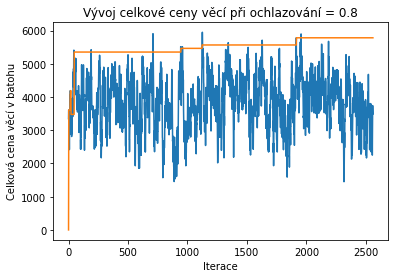

In [247]:
plt.plot(range(0, len(test1)), test1)
plt.plot(range(0, len(test1best)), test1best)
plt.xlabel("Iterace")
plt.ylabel("Celková cena věcí v batohu")
plt.title('Vývoj celkové ceny věcí při ochlazování = 0.8')

Text(0.5, 1.0, 'Vývoj celkové ceny věcí při ochlazování = 0.8')

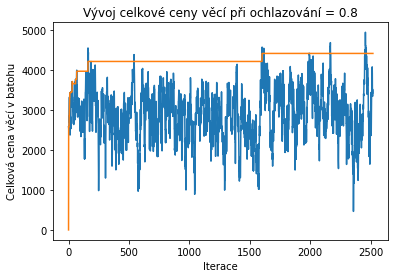

In [248]:
plt.plot(range(0, len(test2)), test2)
plt.plot(range(0, len(test2best)), test2best)
plt.xlabel("Iterace")
plt.ylabel("Celková cena věcí v batohu")
plt.title('Vývoj celkové ceny věcí při ochlazování = 0.8')